<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Loading-and-Preview-of-Data" data-toc-modified-id="Loading-and-Preview-of-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and Preview of Data</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Exploring,-Asking-Questions,-Gaining-Insights" data-toc-modified-id="Exploring,-Asking-Questions,-Gaining-Insights-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring, Asking Questions, Gaining Insights</a></span><ul class="toc-item"><li><span><a href="#Question-1:" data-toc-modified-id="Question-1:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Question 1:</a></span></li><li><span><a href="#Question-2:" data-toc-modified-id="Question-2:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Question 2:</a></span></li><li><span><a href="#Question-3:" data-toc-modified-id="Question-3:-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Question 3:</a></span></li><li><span><a href="#Question-4:" data-toc-modified-id="Question-4:-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Question 4:</a></span></li><li><span><a href="#Question-5:" data-toc-modified-id="Question-5:-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Question 5:</a></span></li></ul></li><li><span><a href="#Overall-Conclusion" data-toc-modified-id="Overall-Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Overall Conclusion</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Findings</a></span></li><li><span><a href="#Limitations" data-toc-modified-id="Limitations-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Limitations</a></span></li></ul></li></ul></div>

**Exploratory Analysis of the Titanic Dataset**

**Project Overview**
> The Dataset contains demographics and passenger information from 891 of th 2224 passeners who boarded the Titanic ship.

# Introduction
> In this Project, I would like to investigate the Titanic Dataset using python libraries Scipy, Numpy, Pandas, Matplotlib and Seaborn.

# Loading and Preview of Data

In [1]:
# first import the necessary python libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
# Now load the dataset into pandas dataframe and
# view the first few rows
titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# view the data information
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> From the above summary, we have 891 entries. It is clear that there are some missing entries in Age, cabin and Embarked. Am going to fix the age column since I will have a number of questions from the same column.

# Data cleaning

> In order to review data by distribution and respond to various questions, I would like to deal with the issue of the misssing ages.

> In this case I will replace the missing values with the mean.

> To have the best representative of values, I will take the mean based on sex and the Pclass. When replacing the missing ages, the two factors will be kept in consideration.

In [4]:
# find mean ages, taking into consideration sex and Pclass.
mean_of_ages = titanic_data.groupby(['Sex', 'Pclass'])['Age'].mean()
display(mean_of_ages)

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [5]:
# replace the null age
def replace_missing_age(entry):
    if pd.isnull(entry['Age']):
        return mean_of_ages[entry['Sex'], entry['Pclass']]
    else:
        return entry['Age']

titanic_data['Age'] = titanic_data.apply(replace_missing_age, axis=1)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Judging from the above the data, the missing ages have been filled

# Exploring, Asking Questions, Gaining Insights

> I am going to do some Exploratory Data Analysis, and as I go along, I will discover some familiarity with statiscal identities and formulars to get to the root of what was happening on the Titanic.
 
 > I will be exploring the the Titanic dataset and respond to some questions. The following are some of the questions about the data:
 - Which gender had a better chance of survival ?
 - What was women and children chance of survival vs adult men (children age<18)
 - What was the probability of survival for children, men and women?
 - Which age group had a better chance of survival?
 - Person travelling with others had more survival possibility?

In [6]:
# Describe the titanic_data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> The mean age is roughly 30 years, while the mean fare is $32.20.  In the descriptive analysis above, there is large variance in fare because the max fare was $512.33, but the max age was only 80.

Text(0.5, 0, 'Age (in Years)')

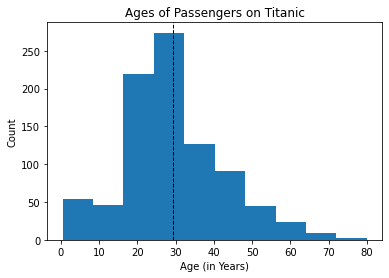

In [7]:
# plot the mean age in the histogram

plt.hist(titanic_data.Age)
plt.axvline(titanic_data.Age.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Ages of Passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Age (in Years)')

Text(0.5, 0, 'Age (in Years)')

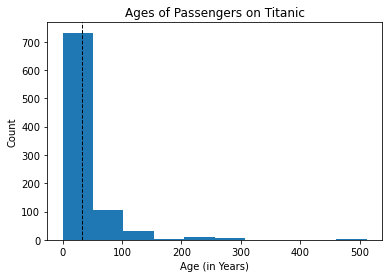

In [8]:
# plot the mean Fare in the histogram

plt.hist(titanic_data.Fare)
plt.axvline(titanic_data.Fare.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Ages of Passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Age (in Years)')

> Judging from the two charts above, we get an insight on how fares had a much larger variance than ages did on the Titanic.

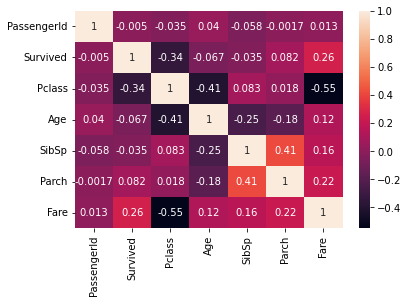

In [9]:
# find the data correlation
sns.heatmap(titanic_data.corr(), annot=True)
plt.show()

## Question 1: 
**Which gender had a better chance of survival ?**


In [10]:
# calculate the total number that survived by sex

# group sex
group_by_gender = titanic_data.groupby('Sex')

#calculate the survived by sex
survived_by_gender = group_by_gender['Survived'].sum()
survived_by_gender.name = 'Survived'
display(survived_by_gender)

#find the total by sex
total_by_gender = group_by_gender['Survived'].size()
total_by_gender.name = 'Total'
display(total_by_gender)

# concat the separate results into one data frame
survived_total_by_gender = pd.concat([survived_by_gender, total_by_gender], axis=1)
survived_total_by_gender

Sex
female    233
male      109
Name: Survived, dtype: int64

Sex
female    314
male      577
Name: Total, dtype: int64

,Survived,Total
Sex,,
female,233,314
male,109,577


In [11]:
# find the percentage that survived
survived_percentage = (survived_total_by_gender['Survived']/survived_total_by_gender['Total'])*100
survived_total_by_gender['Percentage'] = survived_percentage
survived_total_by_gender

,Survived,Total,Percentage
Sex,,,
female,233,314,74.203822
male,109,577,18.890815


**Now we can vizualize our finding**

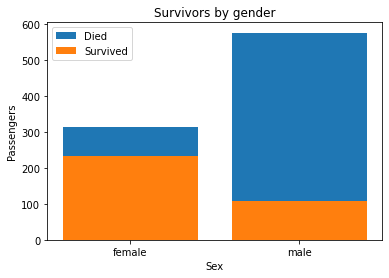

In [12]:
n = range(len(survived_total_by_gender.index.values))
ht = survived_total_by_gender.Total
hs = survived_total_by_gender.Survived

pht = plt.bar(n, ht)
phs = plt.bar(n, hs)

plt.xticks(n, survived_total_by_gender.index.values )
plt.xlabel('Sex')
plt.ylabel('Passengers')
plt.title('Survivors by gender')

plt.legend([pht, phs], ['Died', 'Survived'])

**conclusion**
> In the above visualization and the percentage of survival, it is clear that female survival rate was at 74.2%, and that of male was at 18.9%. This mean women survival rate was 4 times compared to that of men.

> The possible conclusion would be that females were given priority in the rescue operation while some men might have sacrificed themselves to let the female survive.

## Question 2:
**What was women and children chance of survival vs adult men (children age<18)**

In [13]:
women_and_children = titanic_data[(titanic_data['Sex'] == "female") | (titanic_data['Age'] < 18)]
w_a_c_survival_rate = women_and_children['Survived'].value_counts(normalize=True) * 100
w_a_c_survival_rate

1    68.817204
0    31.182796
Name: Survived, dtype: float64

In [14]:
adult_men = titanic_data[(titanic_data['Sex'].str.match('male')) & (titanic_data['Age'] > 16)]
a_m_survival_rate = adult_men['Survived'].value_counts(normalize=True) * 100
a_m_survival_rate

0    83.460076
1    16.539924
Name: Survived, dtype: float64

**conlusion**
> From these two we can see that adult men had an 16.54% chance of survival, while women and children had a 68.82% chance of survival. We can conclude that women and children had a better chance of survival compared to grown men.

## Question 3:
**What was the probability of survival for children, men and women?**

In [15]:
# probability of survival for a child
children = titanic_data[titanic_data['Age']<18]
surviving_children = titanic_data[(titanic_data['Age']<18) & (titanic_data['Survived'] == 1)]
child_chance_of_survival = surviving_children.shape[0]/children.shape[0]
format(child_chance_of_survival, ".0%")

'54%'

In [16]:
# probability of survival for a woman
women = titanic_data[(titanic_data['Sex'] == 'female') & (titanic_data['Age'] > 18)]
surviving_women = titanic_data[(titanic_data['Sex'] == 'female') & (titanic_data['Age'] > 18) & (titanic_data['Survived'] == 1)]
women_chance_of_survival = surviving_women.shape[0]/women.shape[0]
format(women_chance_of_survival, ".0%")

'76%'

In [17]:
# probability of grown men survival
men = titanic_data[(titanic_data['Sex'] == 'male') & (titanic_data['Age'] > 18)]
surviving_men = titanic_data[(titanic_data['Sex'] == 'male') & (titanic_data['Age'] > 18) & (titanic_data['Survived'] == 1)]
men_chance_of_survival = surviving_men.shape[0]/men.shape[0]
format(men_chance_of_survival, ".0%")

'17%'

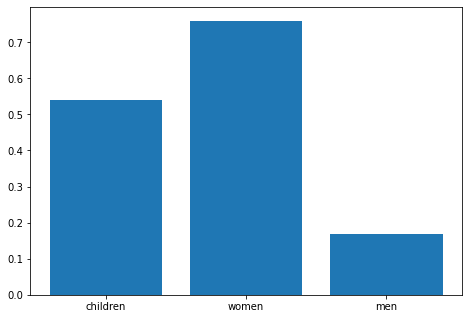

In [18]:
# Now let's graph them:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ["children", "women", "men"]
data = [child_chance_of_survival, women_chance_of_survival, men_chance_of_survival]
ax.bar(x_axis, data)
plt.show()

**conclusion**
> We can conclude that grown women had the best chance of surviving, and children also had a strong chance. Men, however, did not. 

## Question 4:
**Which age group had a better chance of survival?**

First lets review gender age distribution


In [19]:
# review male ages
male_ages = titanic_data[titanic_data.Sex == 'male']['Age']
male_ages.describe()

count    577.000000
mean      30.423672
std       13.264336
min        0.420000
25%       23.000000
50%       27.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
# review women
female_ages = titanic_data[titanic_data.Sex == 'female']['Age']
female_ages.describe()

count    314.000000
mean      27.288063
std       13.091327
min        0.750000
25%       21.000000
50%       24.000000
75%       35.000000
max       63.000000
Name: Age, dtype: float64

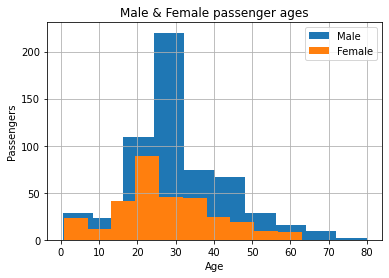

In [21]:
male_ages.hist(label='Male')
female_ages.hist(label='Female')

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.title('Male & Female passenger ages')
plt.legend(loc='best')

From above distribution, we can see that:

- For every age group the number of females was less than number of males
- The age of oldest female was 63, whereas age of oldest male was 80

Now lets do survival analysis by the age group

In [22]:
def age_group(age):
    if age >= 80:
        return '80-89'
    if age >= 70:
        return '70-79'
    if age >= 60:
        return '60-69'
    if age >= 50:
        return '50-59'
    if age >= 40:
        return '40-49'
    if age >= 30:
        return '30-39'
    if age >= 20:
        return '20-29'
    if age >= 10:
        return '10-19'
    if age >= 0:
        return '0-9'
    
titanic_data['AgeGroup'] = titanic_data.Age.apply(age_group)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


In [23]:
# find summary
age_group_summary = titanic_data.groupby(['AgeGroup'], as_index=False)['Survived'].agg([np.sum, np.size])
age_group_summary = age_group_summary.rename(columns={'sum':'Survived', 'size':'Total'})
age_group_summary

,Survived,Total
AgeGroup,,
0-9,38,62
10-19,41,102
20-29,113,358
30-39,84,185
40-49,39,110
50-59,20,48
60-69,6,19
70-79,0,6
80-89,1,1


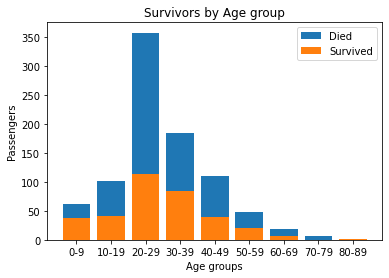

In [24]:
# plot
x = range(len(age_group_summary.index.values))
ht = age_group_summary.Total
hs = age_group_summary.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, age_group_summary.index.values)
plt.xlabel('Age groups')
plt.ylabel('Passengers')
plt.title('Survivors by Age group')


plt.legend([pht,phs],['Died', 'Survived'])

In [25]:
age_group_summary['SurvivedPercent'] = (age_group_summary.Survived / age_group_summary.Total) * 100
age_group_summary['DiedPercent'] = ((age_group_summary.Total - age_group_summary.Survived) / age_group_summary.Total) * 100
age_group_summary

,Survived,Total,SurvivedPercent,DiedPercent
AgeGroup,,,,
0-9,38,62,61.290323,38.709677
10-19,41,102,40.196078,59.803922
20-29,113,358,31.564246,68.435754
30-39,84,185,45.405405,54.594595
40-49,39,110,35.454545,64.545455
50-59,20,48,41.666667,58.333333
60-69,6,19,31.578947,68.421053
70-79,0,6,0.000000,100.000000
80-89,1,1,100.000000,0.000000


- From the above visualization and percentages we can see that most survivors were from 20-29 age group.

- But interestingly survival percentage of 0-9 age group is best - at 61.29%.

- Also above we have seen that female had better survial rate - so these survial rates must be mix of male and female survival rates - and hence to have better view, the gender aspect should also be taken into consideration.

In [26]:
sex_agegroup_summary = titanic_data.groupby(['Sex','AgeGroup'], as_index=False)['Survived'].mean()

sex_agegroup_summary

,Sex,AgeGroup,Survived
0,female,0-9,0.633333
1,female,10-19,0.755556
2,female,20-29,0.681034
3,female,30-39,0.855072
4,female,40-49,0.687500
5,female,50-59,0.888889
6,female,60-69,1.000000
7,male,0-9,0.593750
8,male,10-19,0.122807
9,male,20-29,0.140496


In [27]:
male_agegroup_summary = sex_agegroup_summary[sex_agegroup_summary['Sex'] == 'male']

male_agegroup_summary

,Sex,AgeGroup,Survived
7,male,0-9,0.593750
8,male,10-19,0.122807
9,male,20-29,0.140496
10,male,30-39,0.215517
11,male,40-49,0.217949
12,male,50-59,0.133333
13,male,60-69,0.133333
14,male,70-79,0.000000
15,male,80-89,1.000000


In [28]:
female_agegroup_summary = sex_agegroup_summary[sex_agegroup_summary['Sex'] == 'female']

female_agegroup_summary

,Sex,AgeGroup,Survived
0,female,0-9,0.633333
1,female,10-19,0.755556
2,female,20-29,0.681034
3,female,30-39,0.855072
4,female,40-49,0.687500
5,female,50-59,0.888889
6,female,60-69,1.000000


In [29]:
age_group = titanic_data.AgeGroup.unique()
age_labels = sorted(age_group)
print (age_labels)

['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']


Text(0.5, 1.0, 'Survivors by Gender by Age groups')

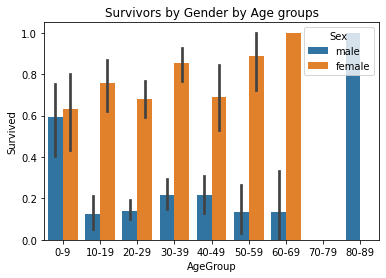

In [30]:
ax = sns.barplot(x='AgeGroup', y='Survived', data=titanic_data, hue='Sex', order=age_labels)
ax.set_title('Survivors by Gender by Age groups')

**conclusion**
> From the proportions above, and the visualization, taking into consideration the gender and age group - it is clearly visible that female and children were given preference in rescue operations by the other male passengers. 0-9 age group both male and female children had very high rate of survival.

## Question 5:
**Person travelling with others had more survival possibility?**

Lets first reivew the distribution of those who were alone, and those who were in company.

In [31]:
is_not_alone = (titanic_data.SibSp + titanic_data.Parch) >= 1
passengers_not_alone = titanic_data[is_not_alone]

is_alone = (titanic_data.SibSp + titanic_data.Parch) == 0
passengers_alone = titanic_data[is_alone]

print('Not alone - describe')
display(passengers_not_alone.describe())
print('Alone - describe')
display(passengers_alone.describe())

Not alone - describe


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,427.796610,0.505650,2.169492,26.316614,1.316384,0.960452,48.832275
std,259.122836,0.500676,0.864520,14.901225,1.420774,1.039512,55.307615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,6.495800
25%,195.000000,0.000000,1.000000,17.000000,1.000000,0.000000,18.000000
50%,419.000000,1.000000,2.000000,26.000000,1.000000,1.000000,27.750000
75%,645.750000,1.000000,3.000000,36.000000,1.000000,2.000000,59.044800
max,889.000000,1.000000,3.000000,70.000000,8.000000,6.000000,512.329200


Alone - describe


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,537.000000,537.000000,537.000000,537.000000,537.0,537.0,537.000000
mean,458.000000,0.303538,2.400372,31.297634,0.0,0.0,21.242689
std,255.714174,0.460214,0.804511,11.694910,0.0,0.0,42.223510
min,3.000000,0.000000,1.000000,5.000000,0.0,0.0,0.000000
25%,235.000000,0.000000,2.000000,23.000000,0.0,0.0,7.775000
50%,466.000000,0.000000,3.000000,27.000000,0.0,0.0,8.137500
75%,681.000000,1.000000,3.000000,36.000000,0.0,0.0,15.000000
max,891.000000,1.000000,3.000000,80.000000,0.0,0.0,512.329200


Text(0.5, 1.0, "Alone & Not Alone Passenger's Ages")

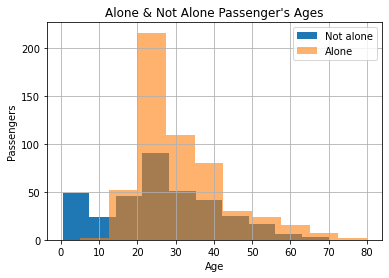

In [32]:
passengers_not_alone.Age.hist(label='Not alone')
passengers_alone.Age.hist(label='Alone', alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.legend(loc='best')
plt.title('Alone & Not Alone Passenger\'s Ages')

From the above distribution we can see that

- Those in age range of 0-10, that is kids, were not alone - which makes sense
- There however is one kid age 5 who was alone
- There was an 80 year old person also who was alone
- 537 passengers were alone, whereas 354 were in company
- Except for age group 0-10, for all other age groups, those travelling alone outnumbered those travelling in company

Now lets review these by their survival



In [33]:
not_alone = np.where((titanic_data.SibSp + titanic_data.Parch) >= 1, 'Not Alone', 'Alone')
loneliness_summary = titanic_data.groupby(not_alone, as_index=False)['Survived'].agg([np.sum, np.size])
loneliness_summary = loneliness_summary.rename(columns={'sum':'Survived', 'size':'Total'})

loneliness_summary

,Survived,Total
Alone,163,537
Not Alone,179,354


In [34]:
loneliness_summary['Percent survived'] = (loneliness_summary.Survived / loneliness_summary.Total) * 100

loneliness_summary

,Survived,Total,Percent survived
Alone,163,537,30.353818
Not Alone,179,354,50.564972


Now lets visualize

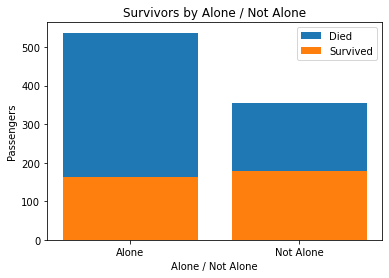

In [35]:
x = range(len(loneliness_summary.index.values))
ht = loneliness_summary.Total
hs = loneliness_summary.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, loneliness_summary.index.values)
plt.xlabel('Alone / Not Alone')
plt.ylabel('Passengers')
plt.title('Survivors by Alone / Not Alone')


plt.legend([pht,phs],['Died', 'Survived'])

**Conclusion**

> Percentage above and visualizations above clearly indicate that people having company had higher survival rate.

# Overall Conclusion
## Findings
- Female survial rate was 74.3%, and male survival rate was 18.9% - so female survival rate was about 4 times that of males. Hence, female and children were given preference in rescue operations, and must have been saved by other male passengers.

- 62.96 percent of 1st class passengers survived, whereas 3rd class passengers survival rate was 24.24% which is about one-third of the first class passengers. This is surprising that the 1st class passengers have high survival, that is they were given preference because of their social class.

- 50% of passengers travelling with family survived, whereas survival percentage was 30% for those travelling alone. Hence survival rate was high for passengers travelling with family, as compared to those travelling alone.

- Children had higer rate of survival as compared to adults

## Limitations
1. **Limitations in the analysis**

Above only visualization, proportions, and percentages have been used to come to conclusions. However improvements could be made in the analysis by using statistical tests.

2. **Limitations of the data**
- The dataset itself has some limitations - it has data missing for certain features/properties of passengers, like age
- Also this data is only sample data from the population/full-data of titanic.
- Missing data and sample size could skew the results, for example becuase of missing ages
- Also we do not know if this sample was properly randomly selected